## Diamonds dataset (ML + Python)

En esta práctica trabajaremos con una versión del dataset conocido como _diamonds_ que nos permitirá trabajar con diferentes técnicas de aprendizaje automático.

**Tarea a realizar**

---
- Predecir el precio de los diamantes como una variable continua.
- Predecir el precio de los diamantes en 4 categorías: barato, normal, caro, muy caro
- Predecir el corte de los diamantes.
---

## 1. Carga y limpieza de los datos

Se procede a importar las librerias a utilizar:

In [205]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, utils, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.linear_model import Perceptron 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

Carga de los datos y visualización del dataset:

In [206]:
df = pd.read_csv('diamonds.csv', index_col=0) 
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [207]:
print("Observaciones: ", df.shape[0])
print("Características: ", df.shape[1])

Observaciones:  53940
Características:  10


In [208]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


El dataset diamonds contiene los datos relativos a precios y otros atributos de 53.940 diamantes y 10 variables.

Las variables que contiene el dataset diamonds son:

    -price: precio en dólares (\$326–\$18,823)
    -carat: quiilate del diamante (0.2–5.01)
    -cut: la calidad del corte (regular, buena, muy buena, superior, ideal)
    -color: color del diamante, desde D (el mejor) hasta J (el peor)
    -clarity: una medida de la claridad del diamante (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor))
    -x: longitud en mm (0-10,74)
    -y: anchura en mm (0-58,9)
    -z: profundidad en mm (0-31,8)

De acuerdo con lo expuesto anteriormente, se ve que hay diamantes con valor '0' para longitud, anchura, y profundidad.
Siendo que esto no es posible, se procede a remover dichos valores:

In [209]:
df2=df
df2[['x','y','z']] = df2[['x','y','z']].replace(0,np.NaN)
df2.dropna(inplace=True)

Se ves que hay algunas columnas categóricas, para transformarlas a enteros se procede a utilizar el siguiente código:

In [210]:
df2["cut"] = df["cut"].astype('category')
df2["color"] = df["color"].astype('category')
df2["clarity"]  = df["clarity"].astype('category')
df2.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

Se relevan los valores únicos de las variables categóricas:

In [211]:
print(np.unique(df['cut']))
print(np.unique(df['color']))
print(np.unique(df['clarity']))

['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']
['D' 'E' 'F' 'G' 'H' 'I' 'J']
['I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']


Se transforman las variables categóricas en dummies:

In [212]:
df3=df2
df3 = pd.get_dummies(df3, columns=['cut','color','clarity'], drop_first=True)
df3.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


Se analiza la correlación entre las variables:

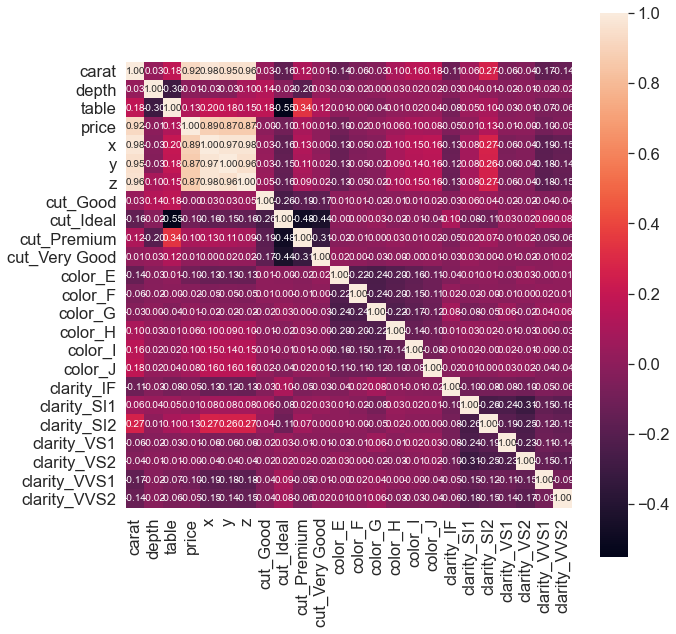

In [213]:
plt.figure(figsize=(10,10))
cm = np.corrcoef(df3[df3.columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=df3.columns, xticklabels=df3.columns)
plt.show();

A continuación, se remueven las variables con multicolinealidad lineal perfecta (mayor a 0.70)

In [214]:
df3 = df3.drop(['x', 'y', 'z'], axis=1)

Se observa que ahora no hay multicolinealidad lineal perfecta entre las variables independendientes.

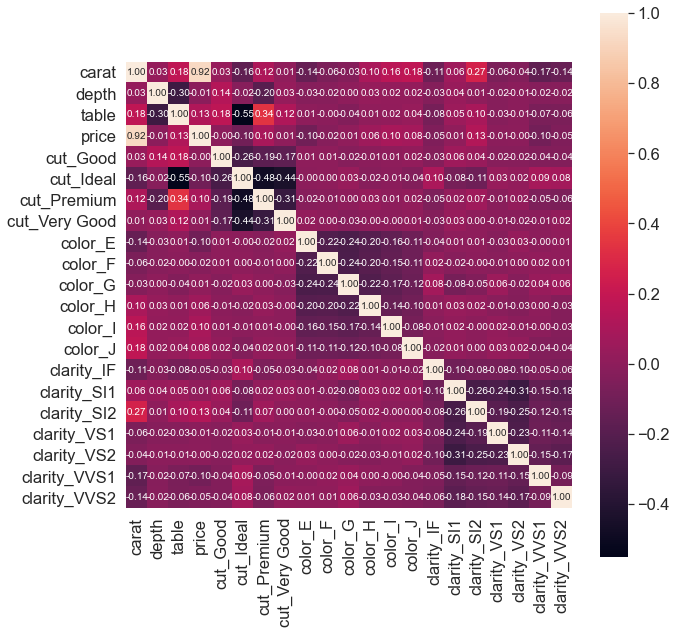

In [215]:
plt.figure(figsize=(10,10))
cm = np.corrcoef(df3[df3.columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=df3.columns, xticklabels=df3.columns)
plt.show();

El precio tiene una gran correlación con carat, por lo que a continuación se plotea de manera de graficar dicha relación.

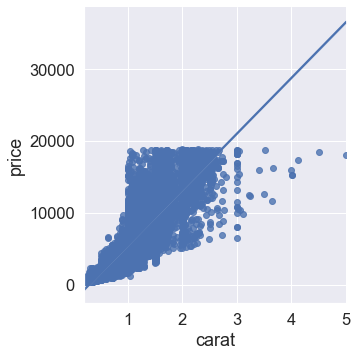

In [216]:
sns.lmplot('carat','price', data=df3)

## 2. Predicción del precio de los diamantes como una variable continua.

### Modelado

#### División en train y test de los datos

En primer lugar se deben crear dos subsets, uno de *training* y otro de *testing*, para entrenar y testear los modelos. 
Asimismo, se aplica una semilla al inicio, de manera de hacer los resultados replicables.

Los datos se dividen de la siguiente manera:

- 70% train
- 30% test

Se define la variable 'price' como la variable target

In [217]:
X = df3.drop(['price'], axis=1)
y = df3['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

#### Regresión lineal

In [218]:
linreg = linear_model.LinearRegression(fit_intercept=True) 
lm = linreg.fit(X_train.values, y_train) 
coef = lm.coef_ 
y_pred = lm.predict(X_test) 

mse= mean_squared_error(y_test, y_pred) 
rmse_lineal = math.sqrt(mse) 

print('RMSE:',rmse_lineal)

RMSE: 1148.8922256338965


#### Regresión Ridge

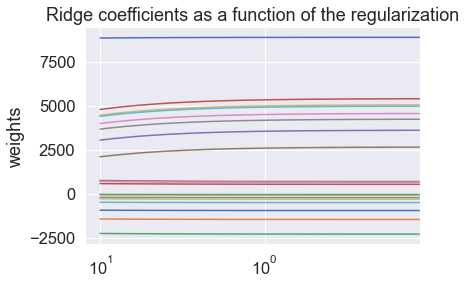

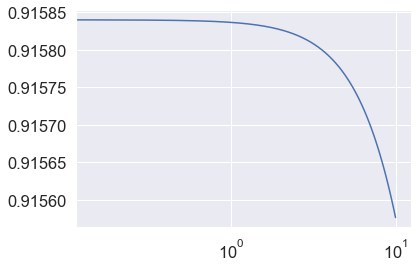

RMSE: 1148.8979816369017


In [225]:
n_alphas = 200
alphas = np.linspace(-6, 10,100)
coefs = []
scores = []
best = (0,0)

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge_fit = ridge.fit(X_train.values, y_train)
    sc=ridge.score(X_train,y_train)
    scores.append(sc)
    coefs.append(ridge_fit.coef_)
    if sc > best[0]:
        best = sc,a
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

plt.figure(2)
plt.plot(alphas,scores);
plt.xscale("log")
plt.show()


ridge = Ridge(alpha=best[1])
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse= mean_squared_error(y_test, y_pred) 
rmse_ridge = math.sqrt(mse) 

print('RMSE:',rmse_ridge)

#### Regresión Lasso

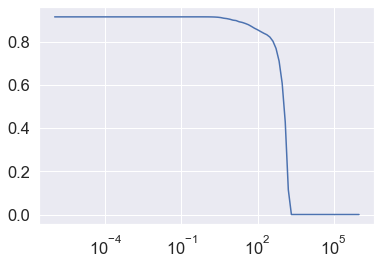

0.916017780324234 0.49770235643321137
RMSE: 1148.2001097497064


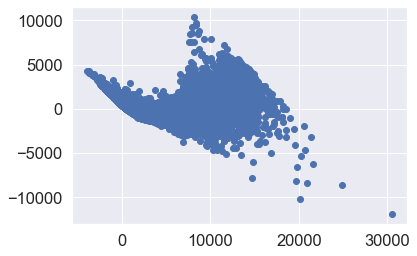

In [157]:
alphas = np.logspace(-6, 6, 100)

scores = []
best = (0,0)
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso_fit= lasso.fit(X_train, y_train);
    sc = lasso_fit.score(X_test,y_test)
    scores.append(sc)
    if sc > best[0]:
        best = sc, alpha
    
plt.plot(alphas, scores)
plt.xscale("log")
plt.show()

lasso = Lasso(alpha=best[1])
lasso_fit= lasso.fit(X_train, y_train);
sc = lasso_fit.score(X_train,y_train)
print(sc, best[1])

y_pred = lasso_fit.predict(X_test)

plt.scatter(y_pred, y_test-y_pred);

mse= mean_squared_error(y_test, y_pred) 
rmse_lasso = math.sqrt(mse)

print('RMSE:',rmse_lasso)

#### Regresión polinómica

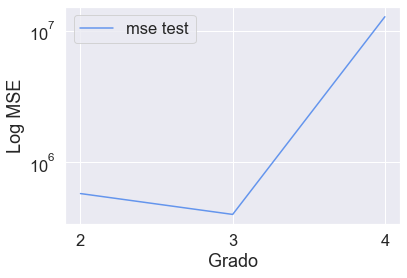

In [158]:
mse_test = []

grados = range(2, 5)

for i in grados:
    polynomial_features = PolynomialFeatures(i)

    linear_regression = LinearRegression()
    polynomial_train = polynomial_features.fit_transform(X_train)    
    polynomial_test = polynomial_features.transform(X_test)
    
    lr = linear_regression.fit(polynomial_train, y_train)
    y_pred = lr.predict(polynomial_test)
    
    sc_p = mean_squared_error(y_test, y_pred)   
    mse_test.append(sc_p)
    
    
plt.plot(grados, mse_test, color="cornflowerblue", label="mse test")
plt.yscale("log")
plt.xticks(grados)
plt.ylabel("Log MSE")
plt.xlabel("Grado")
plt.legend()
plt.show()

In [222]:
polynomial_features = PolynomialFeatures(degree=3)

linear_regression = LinearRegression()
polynomial = polynomial_features.fit_transform(X_train)
    
lr = linear_regression.fit(polynomial_train, y_train)
y_pred = lr.predict(polynomial_test)

mse = mean_squared_error(y_test, y_pred) 
rmse_poly = math.sqrt(mse)

print('RMSE:',rmse_poly)

RMSE: 3571.8535926056834


#### Elastic Net

In [160]:
parametersGrid = {"max_iter": [1000],
    "alpha": [0.001, 0.01, 0.1, 1],
                      "l1_ratio": np.arange(0.0, 1, 0.1)}

eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring='r2',cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'alpha': 0.001, 'l1_ratio': 0.9, 'max_iter': 1000}


In [161]:
regr = ElasticNet(alpha=0.001, l1_ratio= 0.9, max_iter=1000,random_state=3)
regr_fit= regr.fit(X_train, y_train)

y_pred = regr_fit.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
rmse_elastic = math.sqrt(mse) 

print('RMSE:',rmse_elastic)

RMSE: 1148.2843370080293


#### Árbol de regresión

In [162]:
param_grid = {'max_depth': range(1,20)}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid) 

grid_fit= grid.fit(X_train, y_train) 
print(grid_fit.best_params_)

{'max_depth': 16}


In [163]:
regr = DecisionTreeRegressor(max_depth=16, random_state=3)
regr_fit= regr.fit(X_train, y_train)

y_pred = regr_fit.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
rmse_tree = math.sqrt(mse) 

print('RMSE:',rmse_tree)

RMSE: 778.4576871578689


A continuación, se crea una tabla que agrupa los resultados anteriores:

In [229]:
data = {'Modelos': ['Regresión lineal', 'Ridge', 'Lasso', 'Regresión Polinomica', 'Red elástica', 'Árbol de regresión'],
        'RMSE': [rmse_lineal, rmse_ridge, rmse_lasso, rmse_poly, rmse_elastic, rmse_tree]
        }

df_resultados = pd.DataFrame(data)

print (df_resultados)

                Modelos         RMSE
0      Regresión lineal  1148.892226
1                 Ridge  1148.897982
2                 Lasso  1148.200110
3  Regresión Polinomica  3571.853593
4          Red elástica  1148.284337
5    Árbol de regresión   778.457687


Se observa que el modelo que minimiza el error es el de árboles, con un RMSE de 778.45 y una profundidad de 16.

## 2. Predicción del precio de los diamantes en 4 categorías: barato, normal, caro, muy caro

En primer lugar se deben crear intervalos para las 4 categorías a predecir 

In [230]:
df2.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


En base al cuadro anterior podemos realizar la siguiente clasificación:

    -barato: precio hasta 949
    -normal: precio hasta 2401 
    -caro: precio hasta 5323.25 
    -muy caro: precio mayor a 5323.25

In [231]:
df4= df2
df4["precio_discreto"]= pd.NaT 

In [232]:
df4.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,precio_discreto
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,NaT
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,NaT
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,NaT
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,NaT
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,NaT


Se crea una nueva columna con la asignación del tipo de diamante (barato, normal, caro, muy_caro) en base a su precio

In [233]:
rating = []
for row in df4['price']:
    if row < 949.00:    rating.append('1') #barato
    elif row < 2401.0:   rating.append('2') #normal
    elif row < 5323.25:  rating.append('3') #caro
    elif row > 5323.25:  rating.append('4') #muy caro
                
df4['precio_discreto'] = rating

In [234]:
df4.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,precio_discreto
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


In [235]:
df4["precio_discreto"] = df4["precio_discreto"].astype('int32')

Se debe eliminar la variable 'price', ya que 'precio_discreto' contiene en su definición a esta variable.

In [236]:
df4 = df4.drop(['price'], axis=1)

In [237]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   carat            53920 non-null  float64 
 1   cut              53920 non-null  category
 2   color            53920 non-null  category
 3   clarity          53920 non-null  category
 4   depth            53920 non-null  float64 
 5   table            53920 non-null  float64 
 6   x                53920 non-null  float64 
 7   y                53920 non-null  float64 
 8   z                53920 non-null  float64 
 9   precio_discreto  53920 non-null  int32   
dtypes: category(3), float64(6), int32(1)
memory usage: 3.2 MB


Como en el ejercicio 1, se realiza el tratamiento a las variables categóricas

In [238]:
df4= pd.get_dummies(df4, columns=['cut','color','clarity'],drop_first=True)

Se evalua la correlación entre las variables:

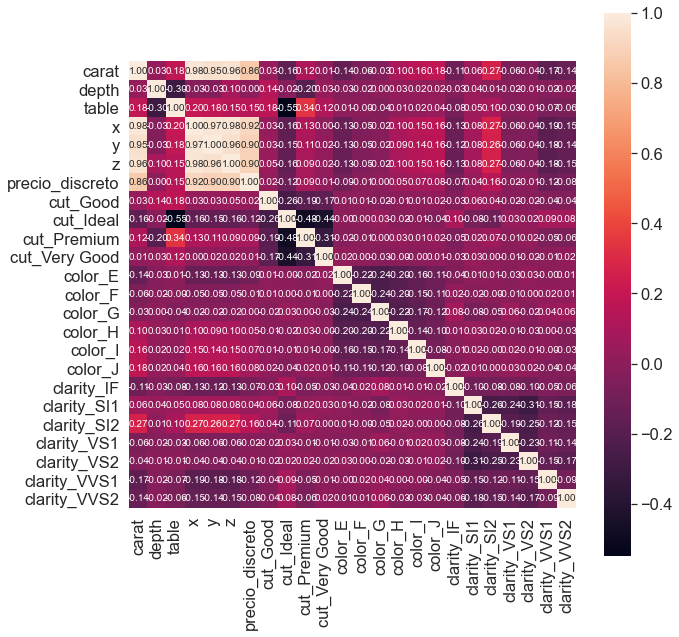

In [239]:
plt.figure(figsize=(10,10))
cm = np.corrcoef(df4[df4.columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=df4.columns, xticklabels=df4.columns)
plt.show();

Se eliminan las variables dependientes con multicolinealidad lineal perfecta (mayor a 0.7)

In [240]:
df5 = df4.drop(['x', 'y', 'z'], axis=1)

In [241]:
df5.head()

,carat,depth,table,precio_discreto,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


Nuevamente se evalua la correlación entre las variables:

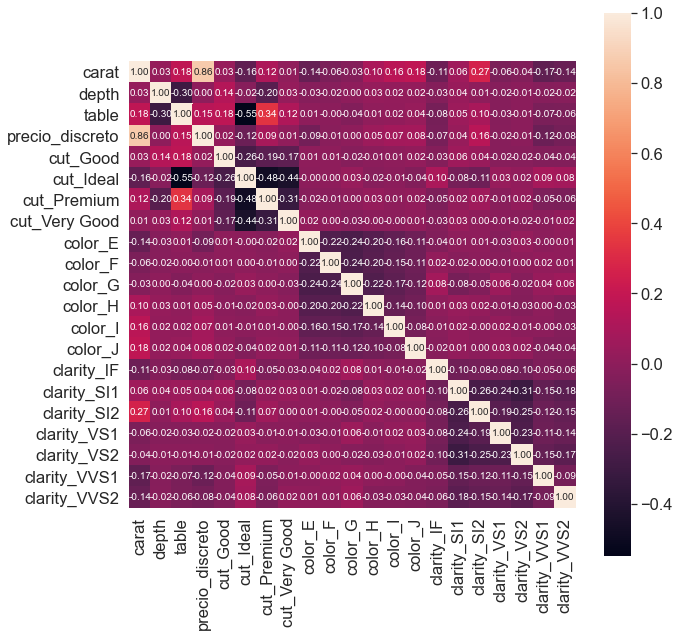

In [242]:
plt.figure(figsize=(10,10))
cm = np.corrcoef(df5[df5.columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=df5.columns, xticklabels=df5.columns)
plt.show();

'precio_discreto' como la variable target:

In [243]:
X = df5.drop(['precio_discreto'], axis=1)
y = df5['precio_discreto']

División en train y test de los datos

En primer lugar se deben crear dos subsets, uno de *training* y otro de *testing*, para entrenar y testear los modelos. 
Asimismo, se aplica una semilla al inicio, de manera de hacer los resultados replicables.

Divido los datos de la siguiente manera:

- 70% train
- 30% test

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

#### Perceptrón:

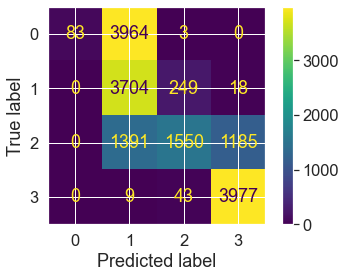

accuracy: 0.5757912957467853
precision: [1.         0.40846934 0.8401084  0.76776062]
recall: [0.02049383 0.93276253 0.37566651 0.98709357]
fscore: [0.04016453 0.56814173 0.51917602 0.86372027]
support: [4050 3971 4126 4029]


In [180]:
clf = Perceptron(tol=1e-3, random_state=3)
clf_fit= clf.fit(X_train, y_train)
y_pred = clf_fit.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

accuracy_perceptron = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy_score(y_test, y_pred)) 

precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#### Regeresión Logística

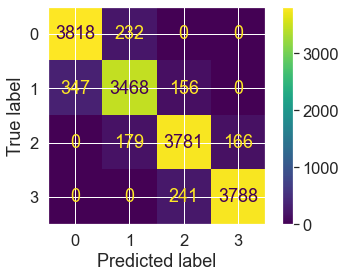

accuracy: 0.9183358061325421
precision: [0.91668667 0.89404486 0.90497846 0.9580172 ]
recall: [0.94271605 0.87333165 0.91638391 0.94018367]
fscore: [0.92951917 0.88356688 0.91064547 0.94901666]
support: [4050 3971 4126 4029]


In [181]:
scs = StandardScaler()
scs.fit(X_train)
X_train_scaled = scs.transform(X_train)
X_test_scaled = scs.transform(X_test)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

lr_clf = LogisticRegression(random_state=3, multi_class='multinomial', max_iter=100)
lr_clf_fit= lr_clf.fit(X_train_scaled, y_train)
y_pred= lr_clf_fit.predict(X_test_scaled)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred)) 
accuracy_logistica = accuracy_score(y_test, y_pred)

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

print('support: {}'.format(support))

#### SVM

In [182]:
param_grid = {'C': [0.01, 0.1],  
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear','rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, y_train) 
 
print(grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.01, gamma=1, kernel=linear ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.870, total=  28.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.6s remaining:    0.0s


[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.876, total=  29.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   58.3s remaining:    0.0s


[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.868, total=  29.6s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.864, total=  28.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.869, total=  24.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.343, total= 1.5min
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.341, total= 1.5min
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.344, total= 1.5min
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.349, total= 1.6min
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 49.7min finished


{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


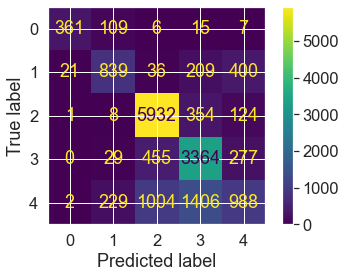

accuracy: 0.7099406528189911
precision: [0.93766234 0.69110379 0.79806269 0.62902019 0.55011136]
recall: [0.7248996  0.55747508 0.92413148 0.81551515 0.27225131]
fscore: [0.81766704 0.61713865 0.85648282 0.71022907 0.36423963]
support: [ 498 1505 6419 4125 3629]


In [204]:
y_pred = grid.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred)) 
accuracy_svc = accuracy_score(y_test, y_pred)

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#### Linear SVM 

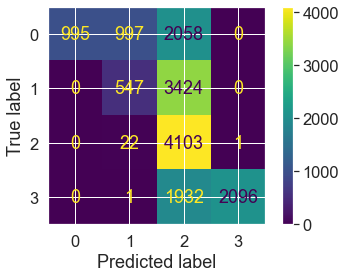

accuracy: 0.4785484668644906
precision: [1.         0.34907466 0.35625597 0.99952313]
recall: [0.24567901 0.13774868 0.99442559 0.52022834]
fscore: [0.39444995 0.19754424 0.52457968 0.68429644]
support: [4050 3971 4126 4029]


In [184]:
clf = LinearSVC(random_state=3, tol=1e-5, max_iter=1000)
clf_fit=clf.fit(X_train, y_train);

y_pred = clf_fit.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred)) 
accuracy_linearsvc = accuracy_score(y_test, y_pred)

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#### Random forests

In [249]:
scores = []
best= (0,0)
n_trees = range(1, 70) 
for i in n_trees:
        
        clf = RandomForestClassifier(n_estimators=i, random_state=3)
        clf.fit(X_train, y_train)
        sc = clf.score(X_train, y_train)
        scores.append(sc)
               
        if sc > best[0]:
            best = sc, i

print(best)


(0.9860905044510386, 66)


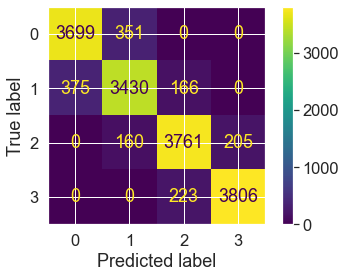

accuracy: 0.9085064292779427
precision: [0.90795287 0.87033748 0.90626506 0.94889055]
recall: [0.91333333 0.86376228 0.9115366  0.94465128]
fscore: [0.91063516 0.86703741 0.90889319 0.94676617]
support: [4050 3971 4126 4029]


In [251]:
clf = RandomForestClassifier(n_estimators=66, random_state=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred))
accuracy_randomforest = accuracy_score(y_test, y_pred)

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#### K-nearest neighbors

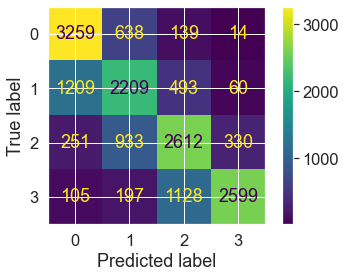

accuracy: 0.660175568743818
precision: [0.67558043 0.5554438  0.59743824 0.86546787]
recall: [0.80469136 0.55628305 0.63305865 0.64507322]
fscore: [0.7345053  0.55586311 0.61473288 0.73919226]
support: [4050 3971 4126 4029]


In [186]:
knn = KNeighborsClassifier(n_neighbors=4, p=2, metric='minkowski')
knn_fit= knn.fit(X_train, y_train)

y_pred = knn_fit.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred)) 
accuracy_knearest = accuracy_score(y_test, y_pred)

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

A continuación una tabla con los resultados anteriores:

In [252]:
data2 = {'Modelos': ['Perceptrón', 'Regresión logística', 'SVM', 'Linear SVM', 'Random forests', 'K-nearest neighbors'],
        'Accuracy': [accuracy_perceptron, accuracy_logistica, accuracy_svc, accuracy_linearsvc, accuracy_randomforest, accuracy_knearest]
        }

df_resultados2 = pd.DataFrame(data2)

print (df_resultados2)

               Modelos  Accuracy
0           Perceptrón  0.575791
1  Regresión logística  0.918336
2                  SVM  0.709941
3           Linear SVM  0.478548
4       Random forests  0.908506
5  K-nearest neighbors  0.660176


Se observa que la mejor clasificación se obtiene con el método de regresión logística, con un accuracy de 0.918

## 3. Predicción del corte de los diamantes.

In [253]:
df6= df2
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 1 to 53940
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   carat            53920 non-null  float64 
 1   cut              53920 non-null  category
 2   color            53920 non-null  category
 3   clarity          53920 non-null  category
 4   depth            53920 non-null  float64 
 5   table            53920 non-null  float64 
 6   price            53920 non-null  int64   
 7   x                53920 non-null  float64 
 8   y                53920 non-null  float64 
 9   z                53920 non-null  float64 
 10  precio_discreto  53920 non-null  int32   
dtypes: category(3), float64(6), int32(1), int64(1)
memory usage: 3.7 MB


Se convierten en dummies las variables categóricas:

In [254]:
df6= pd.get_dummies(df6, columns=['color','clarity'],drop_first=True)

In [255]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 1 to 53940
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   carat            53920 non-null  float64 
 1   cut              53920 non-null  category
 2   depth            53920 non-null  float64 
 3   table            53920 non-null  float64 
 4   price            53920 non-null  int64   
 5   x                53920 non-null  float64 
 6   y                53920 non-null  float64 
 7   z                53920 non-null  float64 
 8   precio_discreto  53920 non-null  int32   
 9   color_E          53920 non-null  uint8   
 10  color_F          53920 non-null  uint8   
 11  color_G          53920 non-null  uint8   
 12  color_H          53920 non-null  uint8   
 13  color_I          53920 non-null  uint8   
 14  color_J          53920 non-null  uint8   
 15  clarity_IF       53920 non-null  uint8   
 16  clarity_SI1      53920 non-null  uint8  

A continuación, se modifican los labels de la variable 'cut' de string a numérico.

In [256]:
s = (df6.dtypes =="category")
object_cols = list(s[s].index)

label_encoder = LabelEncoder()
for col in object_cols:
    df6[col] = label_encoder.fit_transform(df6[col])
df6.head()

,carat,cut,depth,table,price,x,y,z,precio_discreto,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,2,61.5,55.0,326,3.95,3.98,2.43,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,3,59.8,61.0,326,3.89,3.84,2.31,1,1,...,0,0,0,0,1,0,0,0,0,0
3,0.23,1,56.9,65.0,327,4.05,4.07,2.31,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0.29,3,62.4,58.0,334,4.20,4.23,2.63,1,0,...,0,1,0,0,0,0,0,1,0,0
5,0.31,1,63.3,58.0,335,4.34,4.35,2.75,1,0,...,0,0,1,0,0,1,0,0,0,0


Se evalua la correlación entre las variables:

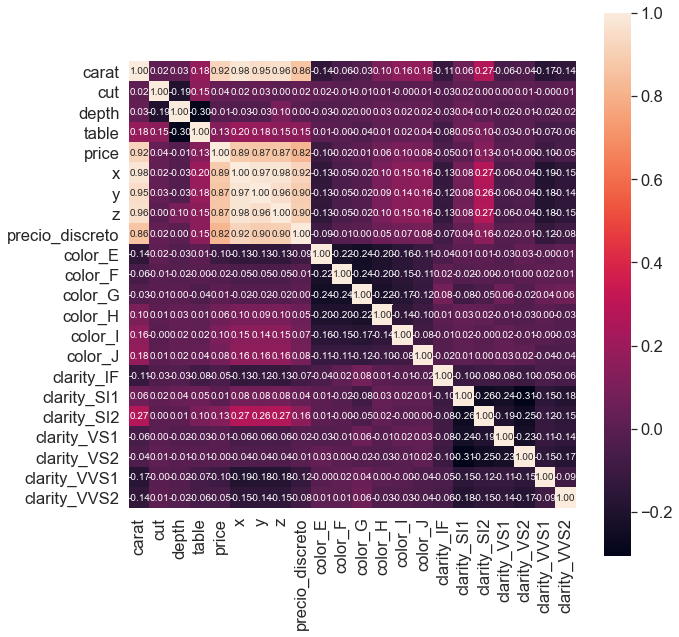

In [257]:
plt.figure(figsize=(10,10))
cm = np.corrcoef(df6[df6.columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=df6.columns, xticklabels=df6.columns)
plt.show();

Se eliminan las variables dependientes con multicolinealidad lineal perfecta (mayor a 0.7) y se evalua nuevamente la correlación:

In [258]:
df6 = df6.drop(['x', 'y', 'z', 'price'], axis=1)

'cut' como la variable target:

In [259]:
X = df6.drop(['cut'], axis=1)
y = df6['cut']

División en train y test de los datos

En primer lugar se deben crear dos subsets, uno de *training* y otro de *testing*, para entrenar y testear los modelos. 
Asimismo, se aplica una semilla al inicio, de manera de hacer los resultados replicables.

Divido los datos de la siguiente manera:

- 70% train
- 30% test

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

#### Perceptrón:

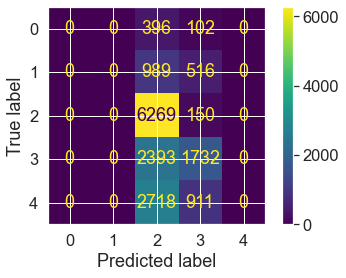

accuracy: 0.49462166172106825
precision: [0.67558043 0.5554438  0.59743824 0.86546787]
recall: [0.80469136 0.55628305 0.63305865 0.64507322]
fscore: [0.7345053  0.55586311 0.61473288 0.73919226]
support: [4050 3971 4126 4029]


In [196]:
clf = OneVsRestClassifier(Perceptron(tol=1e-3, random_state=3))
clf_fit= clf.fit(X_train, y_train)
y_pred = clf_fit.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred))
accuracy_perceptron2 = accuracy_score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#### Regresión Logística

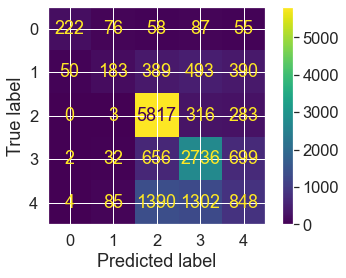

accuracy: 0.6062067260138477
precision: [0.79856115 0.4828496  0.7        0.55451966 0.37274725]
recall: [0.44578313 0.12159468 0.90621592 0.66327273 0.23367319]
fscore: [0.57216495 0.19426752 0.78987032 0.60404018 0.28726287]
support: [ 498 1505 6419 4125 3629]


In [197]:
scs = StandardScaler()
scs.fit(X_train)
X_train_scaled = scs.transform(X_train)
X_test_scaled = scs.transform(X_test)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

lr_clf = LogisticRegression(random_state=3, multi_class='multinomial')
lr_clf_fit= lr_clf.fit(X_train_scaled, y_train)
y_pred= lr_clf_fit.predict(X_test_scaled)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred)) 
accuracy_logistica2 = accuracy_score(y_test, y_pred)

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

print('support: {}'.format(support))

#### SVM

In [198]:
param_grid = {'C': [0.01, 0.1],  
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear','rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, y_train) 

print(grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.01, gamma=1, kernel=linear ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.630, total=  34.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.6s remaining:    0.0s


[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.620, total=  36.9s
[CV] C=0.01, gamma=1, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.623, total=  31.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.626, total=  34.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.629, total=  32.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.422, total= 1.2min
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.427, total= 1.2min
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.425, total= 1.1min
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.423, total= 1.2min
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 46.1min finished


{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


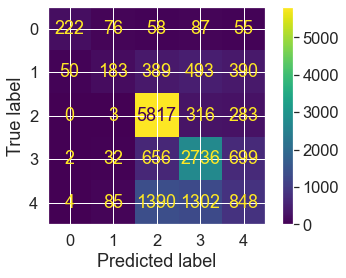

accuracy: 0.6062067260138477
precision: [0.79856115 0.4828496  0.7        0.55451966 0.37274725]
recall: [0.44578313 0.12159468 0.90621592 0.66327273 0.23367319]
fscore: [0.57216495 0.19426752 0.78987032 0.60404018 0.28726287]
support: [ 498 1505 6419 4125 3629]


In [199]:
grid_predictions = grid.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred)) 
accuracy_svc2 = accuracy_score(y_test, y_pred)

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#### Linear SVM

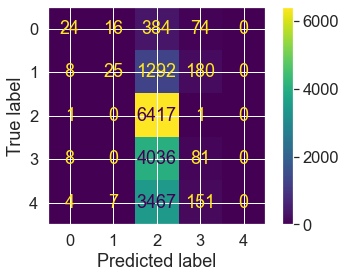

accuracy: 0.40473541048466866
precision: [0.53333333 0.52083333 0.41145165 0.16632444 0.        ]
recall: [0.04819277 0.0166113  0.99968842 0.01963636 0.        ]
fscore: [0.08839779 0.03219575 0.58296616 0.03512576 0.        ]
support: [ 498 1505 6419 4125 3629]


In [200]:
clf = LinearSVC( random_state=3, tol=1e-5)
clf_fit=clf.fit(X_train, y_train);

y_pred = clf_fit.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred)) 
accuracy_linearsvc2 = accuracy_score(y_test, y_pred)

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#### Random forests

In [261]:
scores = []
best= (0,0)
n_trees = range(1, 70) 
for i in n_trees:
        
        clf = RandomForestClassifier(n_estimators=i, random_state=3)
        clf.fit(X_train, y_train)
        sc = clf.score(X_train, y_train)
        scores.append(sc)
               
        if sc > best[0]:
            best = sc, i

print(best)

(0.9473823654090716, 65)


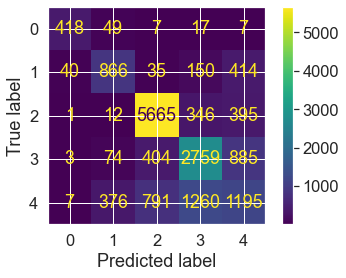

accuracy: 0.6740232443125618
precision: [0.891258   0.62890341 0.82077659 0.60878199 0.41263812]
recall: [0.83935743 0.57541528 0.88253622 0.66884848 0.32929182]
fscore: [0.86452947 0.60097155 0.85053675 0.63740326 0.36628352]
support: [ 498 1505 6419 4125 3629]


In [262]:
clf = RandomForestClassifier(n_estimators=65, random_state=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred))
accuracy_randomforest = accuracy_score(y_test, y_pred)

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#### K-nearest neighbors

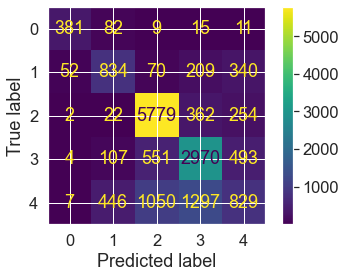

accuracy: 0.6672230464886251
precision: [0.85426009 0.55935614 0.77476874 0.61199258 0.43020239]
recall: [0.76506024 0.55415282 0.900296   0.72       0.22843759]
fscore: [0.80720339 0.55674232 0.83282894 0.66161729 0.29841613]
support: [ 498 1505 6419 4125 3629]


In [202]:
knn = KNeighborsClassifier(n_neighbors=4, p=2, metric='minkowski')
knn_fit= knn.fit(X_train, y_train)

y_pred = knn_fit.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('accuracy:', accuracy_score(y_test, y_pred)) 
accuracy_knearest2 = accuracy_score(y_test, y_pred)

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

A continuación una tabla que agrupa los resultados:

In [263]:
data3 = {'Modelos': ['Perceptrón', 'Regresión logística', 'SVM', 'Linear SVM', 'Random forests', 'K-nearest neighbors'],
        'Accuracy': [accuracy_perceptron2, accuracy_logistica2, accuracy_svc2, accuracy_linearsvc2, accuracy_randomforest2, accuracy_knearest2]
        }

df_resultados3 = pd.DataFrame(data3)

print (df_resultados3)

               Modelos  Accuracy
0           Perceptrón  0.494622
1  Regresión logística  0.606207
2                  SVM  0.606207
3           Linear SVM  0.404735
4       Random forests  0.676929
5  K-nearest neighbors  0.667223


Se observa que el modelo con mejor accuracy es el random forest, con un 0.67 de aciertos